# Armijo line search examples

Consider the problem 

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2}{\text{minimize}}
		& & f(x_1,x_2) = \left(1 - x_{1}\right)^{2} + \left(1 - x_{2}\right)^{2} + \frac{\left(- x_{1}^{2} + 2 x_{2}\right)^{2}}{2}\\
	\end{aligned}
\end{equation*}

having a gradient $$ \nabla f(\mathbf{x}) = \left[\begin{matrix}- 2 x_{1} \left(- x_{1}^{2} + 2 x_{2}\right) + 2 x_{1} - 2\\- 2 x_{1}^{2} + 6 x_{2} - 2\end{matrix}\right]$$ and a Hessian

$$\nabla^2f(\mathbf{x}) = H(\mathbf{x}) = \left[\begin{matrix}6 x_{1}^{2} - 4 x_{2} + 2 & - 4 x_{1}\\- 4 x_{1} & 6\end{matrix}\right]$$


and an optimal solution $\mathbf{x}_0 = (1.21,0.824)$


In [ ]:
import numpy as np

f = lambda x: ((1 - x[0,:] )**2) + ((1 - x[1,:] )**2) + 0.5*((2*x[1,:] - x[0,:]**2)**2)
grad_f = lambda x: np.array([[2*x[0,:]*(x[0,:]**2 - 2*x[1,:]) + 2*x[0,:] - 2], [-2*x[0,:]**2 + 6*x[1,:] - 2]])
H_f = lambda x: np.array([[list(6*x[0,:]**2 - 4*x[1,:] + 2), list(-4*x[0,:])], [list(-4*x[0,:]), 6*np.ones(x.shape[1])]])

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import cm

X1,X2 = np.meshgrid(np.linspace(-3,3,40),np.linspace(-2,5,40))
X = np.vstack((X1.reshape([1,-1]),X2.reshape([1,-1]))) # flatten grids side-by-side

Z = f(X)
Z_grad = grad_f(X)

Let us choose a starting point 
$$\mathbf{x}_0 = \left(-1.0,2.0\right)$$
This gives a steepest descent direction 
$$\mathbf{d}_0^\mathrm{steepest}=-\nabla f(\mathbf{x}_0) = \begin{bmatrix}-2 & -8\end{bmatrix}^\mathrm{T}$$
The direction provided by the inverse of the Hessian is:
$$\mathbf{d}_0=-H^{-1}(\mathbf{x}_0)\nabla f(\mathbf{x}_0) = \left[\begin{matrix}- \frac{3}{8} & \frac{1}{4}\\\frac{1}{4} & 0\end{matrix}\right]\begin{bmatrix}-2 \\ -8\end{bmatrix} = \left[\begin{matrix}- \frac{5}{4} \\- \frac{1}{2}\end{matrix}\right]$$

We can see that the direction provided by Newton's method is not the same as that provided by steepest decent

In [ ]:
x0 = np.array([-1.0,2.0])
grad_f0 = grad_f(x0[:,None]).squeeze()
hessian0 = H_f(x0[:,None]).squeeze()
d0 = -np.linalg.inv(hessian0.squeeze()) @ grad_f0
x_opt = [1.2134116627622296, 0.8241226211091329]

origin = np.array([x0]*3).T # origin point
vectors = np.array([grad_f0, -grad_f0, d0])
x_next = x0 + d0
print(x_next)

fig, ax = plt.subplots(figsize=(7,6))
# plot
ax.contourf(X1, X2, Z.reshape(X1.shape),cmap=cm.coolwarm,levels=25,zorder=-1)
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=50, zorder=1)
ax.quiverkey(Q, 0.15, 0.3, 2, r"$\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=50, zorder=1)
ax.quiverkey(Q, 0.15, 0.2, 2, r"$\mathbf{d}_k = -\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
Q = ax.quiver(*origin, vectors[2:3,0], vectors[2:3,1], color=['g'], scale=10, zorder=1)
ax.quiverkey(Q, 0.15, 0.1, 2, r"$\mathbf{d}_k = -H_0^{-1}\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
ax.scatter([x_opt[0],], [x_opt[1],], marker="o", color="g", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
ax.scatter([x0[0],], [x0[1],], marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}_0$",zorder=3)
ax.scatter([x_next[0],], [x_next[1],], marker="o", color="c", edgecolors="k", linestyle="None",label="$\mathbf{x}_{k+1}$",zorder=3)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.set_xlim((-3,3))
ax.set_ylim((-1,3))
ax.legend()
fig.canvas.draw()
# fig.savefig("linesearch_ex2_contours.pdf",bbox_inches="tight")

We use ``sympy`` below to obtain expressions for the gradient and the Hessian

In [ ]:
def get_real(roots, last=False):
    reals = [root for root in roots if root.is_real]
    if last:
        return reals[-1]
    else:
        return reals[0]

import sympy as sym
import sympy.physics.vector as spv
from sympy import pprint, latex, simplify
from sympy.plotting import plot

a = sym.Symbol(r"\alpha", real=True)
x1 = sym.Symbol(r"x_1")
x2 = sym.Symbol(r"x_2")

f_sym = ((1 - x1 )**2) + ((1 - x2 )**2) + ((2*x2 - x1**2)**2)/2
display(f_sym)
# print(latex(f_sym))

# try the gradient approach
gradf_sym = sym.Matrix([sym.diff(f_sym,x1),sym.diff(f_sym,x2)])
display(gradf_sym)
# print(latex(gradf_sym))

H_sym = sym.Matrix([
    [sym.diff(gradf_sym[0],x1),sym.diff(gradf_sym[0],x2)],
    [sym.diff(gradf_sym[1],x1), sym.diff(gradf_sym[1],x2)]
    ])
display(H_sym)
# print(latex(H_sym))
# display(H_sym.subs({x1:x0[0], x2: x0[1]}))
# display(H_sym.inv().subs({x1:x0[0], x2: x0[1]}))
# display(latex(H_sym.inv().subs({x1:x0[0], x2: x0[1]}) * sym.Matrix([[-2],[-8]])))

Let us consider the BFGS method for approximating the inverse of the Hessian instead of calculating it directly. We perform an inexact line search at every iteration $k$ to determine $\alpha_k$.

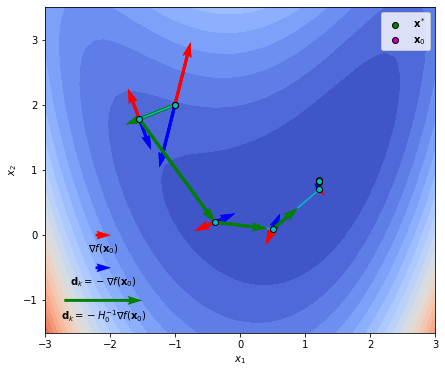

In [15]:
from gradient_descent import GradientDesc

x0 = np.array([-1.0,2.0])
x_opt = [1.2134116627622296, 0.8241226211091329]

solver = GradientDesc(f,grad_f,H_f,x0[:,None],epsilon=0.1,beta=0.9,alpha=0.1,
    type="newton",line_search="armijo",hessian_approximation="exact",verbose=False)

origin = np.array([solver.xk.squeeze()]*3).T # origin point
vectors = np.array([solver.grad_fk.squeeze(), -solver.grad_fk.squeeze(), -(np.linalg.pinv(solver.Hk) @ solver.grad_fk).squeeze()])
# initialize figure
fig, ax = plt.subplots(figsize=(7,6))
# plot
ax.contourf(X1, X2, Z.reshape(X1.shape),cmap=cm.coolwarm,levels=25,zorder=-1)
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=50, zorder=1)
ax.quiverkey(Q, 0.15, 0.3, 2, r"$\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=50, zorder=1)
ax.quiverkey(Q, 0.15, 0.2, 2, r"$\mathbf{d}_k = -\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
Q = ax.quiver(*origin, vectors[2:3,0], vectors[2:3,1], color=['g'], scale=10, zorder=1)
ax.quiverkey(Q, 0.15, 0.1, 2, r"$\mathbf{d}_k = -H_0^{-1}\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
ax.scatter([x_opt[0],], [x_opt[1],], marker="o", color="g", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
ax.scatter([x0[0],], [x0[1],], marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}_0$",zorder=3)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.set_xlim((-3,3))
ax.set_ylim((-1,3))
ax.legend()

norms = []
errors = []
iterations = 200
x = [solver.xk[0]]; y = [solver.xk[1]]
for k in range(iterations):
    norm,error_BFGS = solver.step()
    norms += [norm]
    errors += [error_BFGS]
    x += [solver.xk[0]]; y += [solver.xk[1]]

    if k < 20:
        origin = np.array([solver.xk.squeeze()]*3).T # origin point
        vectors = np.array([solver.grad_fk.squeeze(), -solver.grad_fk.squeeze(), -(np.linalg.pinv(solver.Hk) @ solver.grad_fk).squeeze()])
        Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=50, zorder=2)
        Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=50, zorder=2)
        Q = ax.quiver(*origin, vectors[2:3,0], vectors[2:3,1], color=['g'], scale=10, zorder=2)
        fig.canvas.draw()

ax.scatter(x,y, linestyle="None", marker="o", color="c", edgecolors="k",zorder=3)
ax.plot(x,y, linestyle="-", marker="None", color="c", zorder=1)


# fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
# axs[0].plot(list(range(iterations)),norms)
# axs[0].set_ylabel(r"$||\nabla f(\mathbf{x})||$")
# axs[0].set_xlabel(r"$k$")
# axs[1].plot(list(range(iterations)),errors)
# axs[1].set_ylabel(r"mean squared error of $\hat{H}_k - H_k$")
# axs[1].set_xlabel(r"$k$");